In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### data without outliers

In [2]:
newd = pd.read_csv('outlier_filtered_with_lying_down.csv')

In [3]:
newd.posture.value_counts()

lying_down          13206
sitting               551
standing+walking      342
Name: posture, dtype: int64

In [4]:
def activity_selection(df_ecg):
    df_ecg.loc[(df_ecg['activity']=='AdministrativeWork') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='RecreationalActivities(Active)') & (df_ecg['posture'] != 'standing+walking'), ['posture']] = 'standing+walking'
    df_ecg.loc[(df_ecg['activity']=='HouseholdActivities') & (df_ecg['posture'] != 'standing+walking'), ['posture']] = 'standing+walking'
    df_ecg.loc[(df_ecg['activity']=='DeskWork') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='WatchingTV') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='Transportation(Active)') & (df_ecg['posture'] != 'standing+walking'), ['posture']] = 'standing+walking'
    df_ecg.loc[(df_ecg['activity']=='Eating/Drinking') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='Reading/Internet/OtherRecreativePCUse') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='Telephone/TalkingPrivate') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='RecreationalActivities(Passive)') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='RecreationalActivities') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='Transportation(Active)') & (df_ecg['posture'] != 'standing+walking'), ['posture']] = 'standing+walking'
    df_ecg.loc[(df_ecg['activity']=='Transportation(Passive)') & (df_ecg['posture'] != 'standing+walking'), ['posture']] = 'standing+walking'
    df_ecg.loc[(df_ecg['activity']=='Intervention') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='PhysicalWork') & (df_ecg['posture'] != 'standing+walking'), ['posture']] = 'standing+walking'
    df_ecg.loc[(df_ecg['activity']=='Telephone/TalkingAtWork') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.drop(df_ecg.loc[df_ecg['activity']== 'Unknown'].index, inplace=True)
    #df_ecg = df_ecg.loc[(df_ecg['posture'] == 'sitting') | (df_ecg['posture'] == 'standing+walking')]
    df_ecg = df_ecg.reset_index()
    df_ecg = df_ecg.drop('index', axis=1)
    return df_ecg

In [5]:
newd  = activity_selection(newd)
newd.posture.value_counts()

lying_down          13206
sitting               551
standing+walking      342
Name: posture, dtype: int64

In [6]:
#df1['Average_HR_bpm'].groupby("posture", as_index=False).shift(-1)
newd['lagg_HR'] = newd['Average_HR_bpm'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['next_HR'] = newd['Average_HR_bpm'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

newd['2lagg_HR'] = newd['lagg_HR'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['2next_HR'] = newd['next_HR'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

newd['3lagg_HR'] = newd['2lagg_HR'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['3next_HR'] = newd['2next_HR'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

newd['4lagg_HR'] = newd['3lagg_HR'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['4next_HR'] = newd['3next_HR'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

newd['5lagg_HR'] = newd['4lagg_HR'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['5next_HR'] = newd['4next_HR'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

In [7]:
#df1['Average_HR_bpm'].groupby("posture", as_index=False).shift(-1)
newd['lagg_RMS'] = newd['Average_Mot_mg'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['next_RMS'] = newd['Average_Mot_mg'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

newd['2lagg_RMS'] = newd['lagg_RMS'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['2next_RMS'] = newd['next_RMS'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

newd['3lagg_RMS'] = newd['2lagg_RMS'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['3next_RMS'] = newd['2next_RMS'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

In [8]:
cols = [ 'Average_Mot_mg', '2lagg_RMS', '2next_RMS', '3lagg_HR', '3next_HR']

dfx = newd[cols]
dfx

,Average_Mot_mg,2lagg_RMS,2next_RMS,3lagg_HR,3next_HR
0,0.53,0.53,1.06,65.95,63.31
1,1.89,0.53,0.24,65.95,76.89
2,1.06,0.53,1.77,65.95,69.83
3,0.24,1.89,0.24,65.95,71.13
4,1.77,1.06,0.00,62.04,73.89
...,...,...,...,...,...
14094,0.00,0.00,0.00,60.11,59.75
14095,0.00,0.00,0.00,60.62,61.61
14096,0.00,0.00,0.00,60.99,61.61
14097,0.00,0.00,0.00,60.88,61.61


In [10]:
y = newd.pop('posture')

In [9]:
x = np.array(dfx)
x.shape

(14099, 5)

### Learning curve

(Text(0.5, 0, 'Training Set Size'),
 Text(0, 0.5, 'f1-score'),
 <matplotlib.legend.Legend at 0x27077031580>)

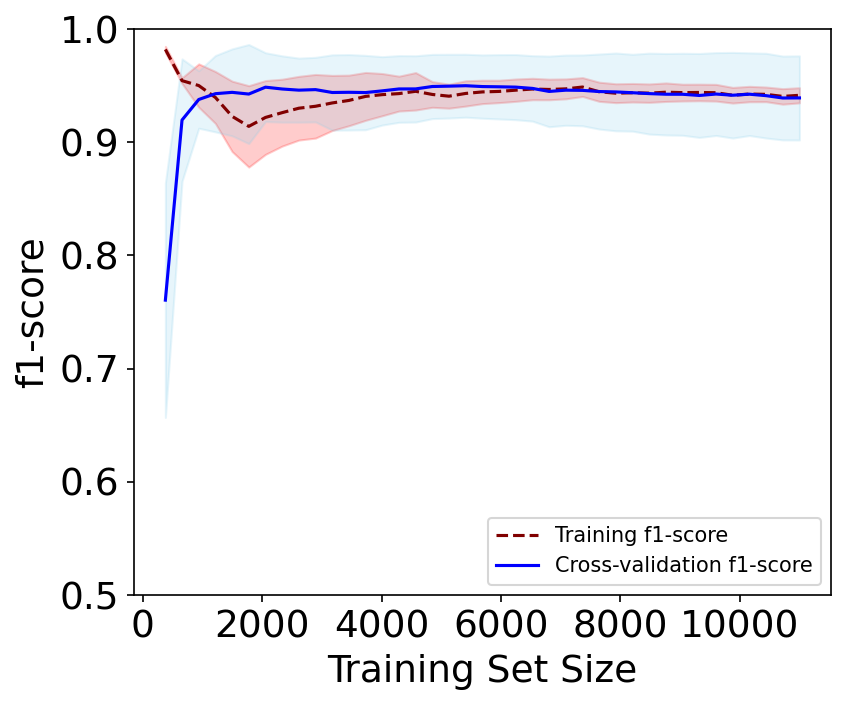

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold

svc = SVC(C = 0.01, kernel = 'linear', random_state = 3, class_weight='balanced') 

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(svc, x, y, 
                                    cv=KFold(n_splits=5, shuffle = False), scoring='f1_weighted', 
                                                        n_jobs=-1, train_sizes=np.linspace(100, 11000, num=40, dtype = int))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.rcParams['figure.dpi'] = 150

plt.subplots(1, figsize=(6,5))
plt.plot(train_sizes, train_mean, '--', color="maroon",  label="Training f1-score")
plt.plot(train_sizes, test_mean, color="blue", label="Cross-validation f1-score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="red", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="skyblue", alpha=0.2)
#plt.xlim(100, 11000)
plt.ylim(0.5, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title("Learning Curve")
plt.xlabel("Training Set Size", fontsize=18), plt.ylabel("f1-score", fontsize=18), plt.legend(loc="lower right")
#plt.savefig('SVM learning curve new.png', bbox_inches='tight')

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils.class_weight import compute_class_weight

In [14]:
plt.rcParams['figure.dpi'] = 70

def training_evaluation(ypred, ytrue, i, accuracy = [], score = []):
    # compute accuracy by averaging the predicted class over the whole time series
    m1 = f1_score(ytrue, ypred, average='weighted', zero_division = 0)
    score.append(m1)
    a1 =  accuracy_score(ytrue, ypred)
    accuracy.append(a1)
    print(f"\n -------------Classification Report for Training CV #{i}-------------\n")
    print(classification_report(ytrue, ypred))

    labels = ['lying_down', 'sitting', 'standing+walking']
    #gig_ = plt.figure(figsize=(5, 4))
    confusion_matrix_1 = confusion_matrix(ytrue, ypred)
    sns.heatmap(confusion_matrix_1, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
    plt.title(f'Training confusion matrix for cv #{i}', fontsize = 15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #run["train/evaluation/cm-img"].log(gig_)
    plt.show()
    
    return score, accuracy

In [15]:
plt.rcParams['figure.dpi'] = 70

def validation_evaluation(ypred, ytrue, i, accuracy = [], score = []):
    # compute accuracy by averaging the predicted class over the whole time series
    m1 = f1_score(ytrue, ypred, average='weighted', zero_division = 0)
    score.append(m1)
    a1 =  accuracy_score(ytrue, ypred)
    accuracy.append(a1)
    print(f"\n -------------Classification Report for validation CV #{i}-------------\n")
    print(classification_report(ytrue, ypred))

    labels = ['lying_down', 'sitting', 'standing+walking']
    confusion_matrix_1 = confusion_matrix(ytrue, ypred)
    #gig_ = plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix_1, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
    plt.title(f'Validation confusion matrix for cv #{i}', fontsize = 15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #run["validation/evaluation/cm-img"].log(gig_)
    plt.show()
    
    return score, accuracy


 -------------Classification Report for Training CV #0-------------

                  precision    recall  f1-score   support

      lying_down       0.99      0.95      0.97     10550
         sitting       0.35      0.73      0.47       430
standing+walking       0.85      0.90      0.87       299

        accuracy                           0.94     11279
       macro avg       0.73      0.86      0.77     11279
    weighted avg       0.96      0.94      0.95     11279



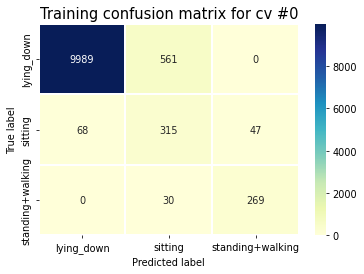


 -------------Classification Report for validation CV #0-------------

                  precision    recall  f1-score   support

      lying_down       0.99      0.82      0.90      2656
         sitting       0.14      0.67      0.24       121
standing+walking       0.70      0.93      0.80        43

        accuracy                           0.81      2820
       macro avg       0.61      0.81      0.64      2820
    weighted avg       0.95      0.81      0.87      2820



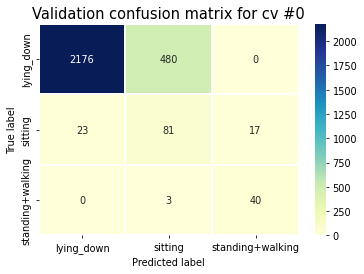


 -------------Classification Report for Training CV #1-------------

                  precision    recall  f1-score   support

      lying_down       0.99      0.92      0.95     10563
         sitting       0.26      0.71      0.38       453
standing+walking       0.84      0.91      0.87       263

        accuracy                           0.91     11279
       macro avg       0.70      0.84      0.74     11279
    weighted avg       0.96      0.91      0.93     11279



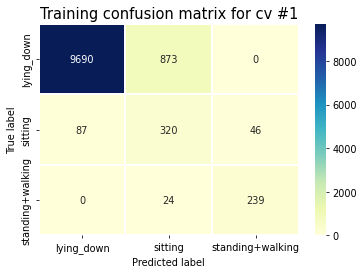


 -------------Classification Report for validation CV #1-------------

                  precision    recall  f1-score   support

      lying_down       1.00      0.98      0.99      2643
         sitting       0.57      0.92      0.70        98
standing+walking       0.96      0.81      0.88        79

        accuracy                           0.97      2820
       macro avg       0.84      0.90      0.86      2820
    weighted avg       0.98      0.97      0.98      2820



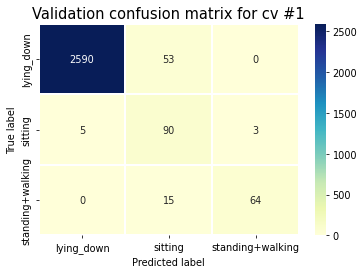


 -------------Classification Report for Training CV #2-------------

                  precision    recall  f1-score   support

      lying_down       0.99      0.90      0.95     10606
         sitting       0.23      0.77      0.36       414
standing+walking       0.85      0.90      0.88       259

        accuracy                           0.90     11279
       macro avg       0.69      0.86      0.73     11279
    weighted avg       0.96      0.90      0.92     11279



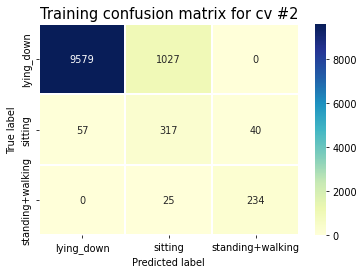


 -------------Classification Report for validation CV #2-------------

                  precision    recall  f1-score   support

      lying_down       0.99      0.80      0.89      2600
         sitting       0.15      0.66      0.24       137
standing+walking       0.70      0.98      0.82        83

        accuracy                           0.80      2820
       macro avg       0.62      0.81      0.65      2820
    weighted avg       0.94      0.80      0.85      2820



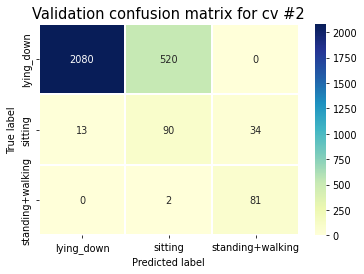


 -------------Classification Report for Training CV #3-------------

                  precision    recall  f1-score   support

      lying_down       0.99      0.94      0.96     10500
         sitting       0.32      0.67      0.43       479
standing+walking       0.81      0.90      0.85       300

        accuracy                           0.93     11279
       macro avg       0.71      0.84      0.75     11279
    weighted avg       0.96      0.93      0.94     11279



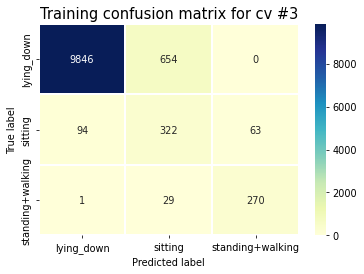


 -------------Classification Report for validation CV #3-------------

                  precision    recall  f1-score   support

      lying_down       0.99      0.99      0.99      2706
         sitting       0.61      0.79      0.69        72
standing+walking       1.00      0.95      0.98        42

        accuracy                           0.98      2820
       macro avg       0.87      0.91      0.88      2820
    weighted avg       0.98      0.98      0.98      2820



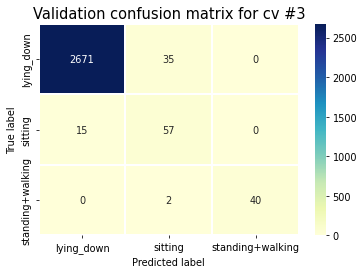


 -------------Classification Report for Training CV #4-------------

                  precision    recall  f1-score   support

      lying_down       0.99      0.94      0.96     10605
         sitting       0.32      0.75      0.45       428
standing+walking       0.83      0.91      0.87       247

        accuracy                           0.93     11280
       macro avg       0.71      0.87      0.76     11280
    weighted avg       0.96      0.93      0.94     11280



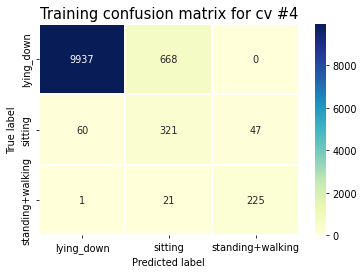


 -------------Classification Report for validation CV #4-------------

                  precision    recall  f1-score   support

      lying_down       0.98      0.99      0.99      2601
         sitting       0.59      0.55      0.57       123
standing+walking       0.88      0.85      0.87        95

        accuracy                           0.96      2819
       macro avg       0.82      0.80      0.81      2819
    weighted avg       0.96      0.96      0.96      2819



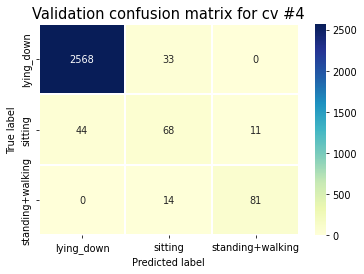

Training mean accuracy 0.935996737351253
Training mean f1-score 0.9197991072972492
Validation mean accuracy 0.9282796862086258
Validation mean f1-score 0.9062385685784659


In [16]:

kfold = KFold(n_splits=5, shuffle = False)
# Dataframe with misclassified examples
misclf_df = pd.DataFrame(
    {
        'folds' : np.zeros(x.shape[0]), 
        'is_misclassified' : np.zeros(x.shape[0])
    },
)

outs =[]
for i, (train_idx, test_idx) in enumerate(kfold.split(x, y)):

    #get train/test split for current fold
    X_train, y_train = x[train_idx], y[train_idx]
    X_test, y_test = x[test_idx], y[test_idx]


 # standardization
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_data_lr_1 = scaler.transform(X_train)
    X_test_data_lr_1 = scaler.transform(X_test)

    #C = trial.suggest_categorical('C', [0.01, 0.1, 1, 10])

    ###random forest model
    svc = SVC(C = 0.01, kernel = 'linear', random_state = 3,  class_weight='balanced') 
    # fit classifier to training set
    svc.fit(X_train_data_lr_1, y_train)
    #calculate training accuracy
    y_pred_train = svc.predict(X_train_data_lr_1)
    y_pred = svc.predict(X_test_data_lr_1)
    outs.append(y_pred)

    # write results
    misclf_df.loc[test_idx, 'folds'] = i
    misclf_df.loc[test_idx, 'is_misclassified'] = svc.predict(X_test_data_lr_1) != y_test
    accuracy_tr, f1_tr = training_evaluation(y_pred_train, y_train, i)
#run["train/fl-score"].log(f1_tr)
#run["train/accuracy"].log(accuracy_tr)
    acc_val, f1_val = validation_evaluation(y_pred, y_test, i)
#run["validation/fl-score"].log(f1_val)
#run["validation/accuracy"].log(acc_val)

f1_score_cv = np.mean(f1_val)
print('Training mean accuracy', np.mean(accuracy_tr))
print('Training mean f1-score', np.mean(f1_tr))
print('Validation mean accuracy', np.mean(acc_val))
print('Validation mean f1-score', np.mean(f1_val))

In [ ]:
#################################################Optuna Results######################################    
study = optuna.create_study(direction='maximize')
study.optimize(objective, callbacks = [neptune_callback] )

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


In [18]:
y_fin_pred = np.concatenate(outs)

In [19]:
y_fin_pred

array(['lying_down', 'sitting', 'lying_down', ..., 'lying_down',
       'lying_down', 'lying_down'], dtype=object)

In [20]:
newd['pred'] = y_fin_pred

In [24]:
newd['posture'] = y

In [25]:
missclass = newd.loc[newd['posture'] != newd['pred']]
missclass = missclass.reset_index()
missclass = missclass.drop('index', axis=1)
missclass

,Start,Average_IBI_msec,SDNN_msec,Min_IBI_msec,Max_IBI_msec,Average_HR_bpm,StdDev_HR_bpm,Min_HR_bpm,Max_HR_bpm,RMSSD_msec,...,5lagg_HR,5next_HR,lagg_RMS,next_RMS,2lagg_RMS,2next_RMS,3lagg_RMS,3next_RMS,pred,posture
0,2021-05-17 16:39:18,913.15,55.21,755.0,1030.0,65.95,4.17,58.25,79.47,24.98,...,65.95,69.83,0.53,1.89,0.53,1.06,0.53,0.24,lying_down,sitting
1,2021-05-17 16:41:18,944.39,53.90,811.0,1035.0,63.75,3.84,57.97,73.98,31.56,...,65.95,73.89,1.89,0.24,0.53,1.77,0.53,0.24,lying_down,sitting
2,2021-05-17 16:42:18,953.98,77.73,785.0,1189.0,63.31,5.28,50.46,76.43,56.89,...,65.95,78.17,1.06,1.77,1.89,0.24,0.53,0.00,lying_down,sitting
3,2021-05-17 18:27:18,784.87,59.95,682.0,887.0,76.89,5.84,67.64,87.98,22.37,...,65.95,85.77,0.24,0.24,1.06,0.00,1.89,2.95,lying_down,sitting
4,2021-05-17 19:21:18,701.11,33.60,646.0,813.0,85.77,3.97,73.80,92.88,13.68,...,76.89,76.25,10.40,30.49,2.95,21.39,0.00,42.18,standing+walking,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,2021-06-17 13:02:52,994.31,39.99,878.0,1056.0,60.44,2.53,56.82,68.34,36.65,...,79.78,66.57,1.30,0.18,0.77,0.47,0.53,0.89,lying_down,sitting
1318,2021-06-17 13:03:52,995.37,62.70,837.0,1109.0,60.53,4.02,54.10,71.68,43.80,...,87.50,85.71,0.71,0.47,1.30,0.89,0.77,0.00,lying_down,sitting
1319,2021-06-17 18:35:52,916.83,67.01,802.0,1062.0,65.78,4.75,56.50,74.81,48.35,...,77.66,85.65,0.18,0.89,0.71,0.00,1.30,2.01,lying_down,sitting
1320,2021-06-17 19:33:52,700.65,20.33,651.0,749.0,85.71,2.49,80.11,92.17,11.43,...,60.53,79.03,2.01,0.59,0.00,0.06,0.89,0.06,lying_down,sitting


In [26]:
a = missclass.posture.value_counts().values

In [27]:
x = newd.posture.value_counts().values
c = (a /x) *100

In [28]:
newd.posture.value_counts()

lying_down          13206
sitting               551
standing+walking      342
Name: posture, dtype: int64

In [29]:
cols = ['lying_down', 'sitting', 'standing+walking']
b = pd.DataFrame(c, index = cols)

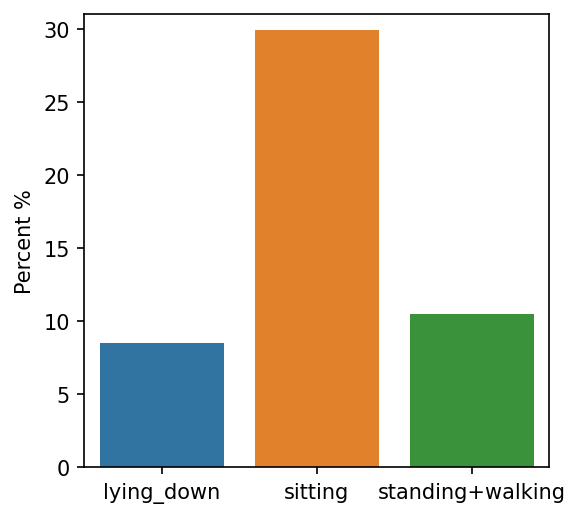

In [30]:
b = b.rename(columns = {0: 'percent'})
plt.rcParams['figure.dpi'] = 150
plt.figure(figsize=(4,4))
ax = sns.barplot(y = 'percent', x=b.index, data=b)
ax.set_ylabel('Percent %')
ax.set_ylim(0, 31)
plt.savefig('svm all missclassified by posture', bbox_inches='tight')

In [ ]:
x / a *100

In [31]:
kfold = KFold(n_splits=5, shuffle = False)
# Dataframe with misclassified examples
misclf_df = pd.DataFrame(
    {
        'folds' : np.zeros(x.shape[0]), 
        'is_misclassified' : np.zeros(x.shape[0])
    },
)

for i, (train_idx, test_idx) in enumerate(kfold.split(x, y)):

    #get train/test split for current fold
    X_train, y_train = x[train_idx], y[train_idx]
    X_test, y_test = x[test_idx], y[test_idx]


 # standardization
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_data_lr_1 = scaler.transform(X_train)
    X_test_data_lr_1 = scaler.transform(X_test)

    ###random forest model
    svc = SVC(C = 0.01, kernel = 'linear', random_state = 3,  class_weight='balanced') 
    # fit classifier to training set
    svc.fit(X_train_data_lr_1, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [3, 14099]

In [34]:
from sklearn.inspection import permutation_importance

cols = ['Combined RMS','2lagg_RMS', '2next_RMS', '3lagg_HR', '3next_HR']
idx = ['lying_down', 'sitting', 'standing+walking']

In [35]:
result = permutation_importance(
    svc, X_test_data_lr_1, y_test, n_repeats=10, random_state=42, scoring='f1_weighted')
forest_importances = pd.Series(result.importances_mean, index=cols)

<Figure size 1000x800 with 0 Axes>

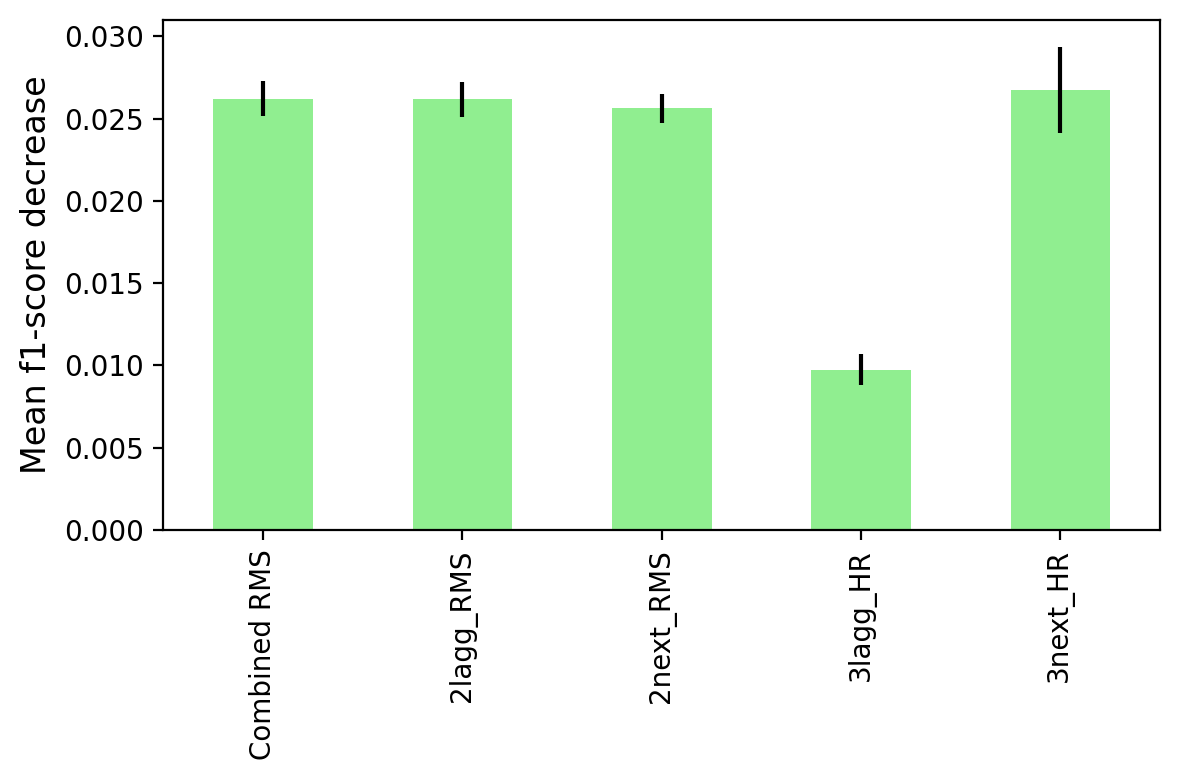

In [36]:
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(5, 4))
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax, color = 'lightgreen')
#ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean f1-score decrease", fontsize=12)
ax.set_ylim(0, 0.031)
fig.tight_layout()
plt.savefig('SVM feature importance.png', bbox_inches='tight')

### Plot Descision function

In [32]:
y_ohe = np.where(y == 'sitting', 0, 1)

outs = pd.DataFrame(x[test_idx], columns = {'acc', 'hr', 'next_hr'})
outs = outs.rename(columns={"acc" : "lead_hr", "hr" : "accel", "next_hr" : "hr_"})

outs['ypred'] = y_pred
outs['ytrue'] = y[test_idx].values

x_df = pd.DataFrame(x, columns = {'acc', 'hr', 'lead_hr'})
x_df = x_df.rename(columns={"lead_hr": "hr_", "acc" : "next_hr", "hr" : "accel"})

svc = SVC(C = 10, kernel = 'rbf', random_state = 3, class_weight='balanced') 
# fit classifier to training set
svc.fit(x_d, y)

cols = ['accel', 'hr_']
x_df[cols].values

IndexError: index 11280 is out of bounds for axis 0 with size 3

In [37]:
b, y_te = np.unique(y_test, return_inverse=True)


In [39]:
b

array(['lying_down', 'sitting', 'standing+walking'], dtype=object)

In [ ]:
b, y_ohe = np.unique(y_train, return_inverse=True)
svc = SVC(C = 0.01, kernel = 'linear', random_state = 3,  class_weight='balanced') 
    # fit classifier to training set
svc.fit(X_train_data_lr_1[:, [1,4]], y_ohe)

ValueError: X has 2 features, but SVC is expecting 5 features as input.

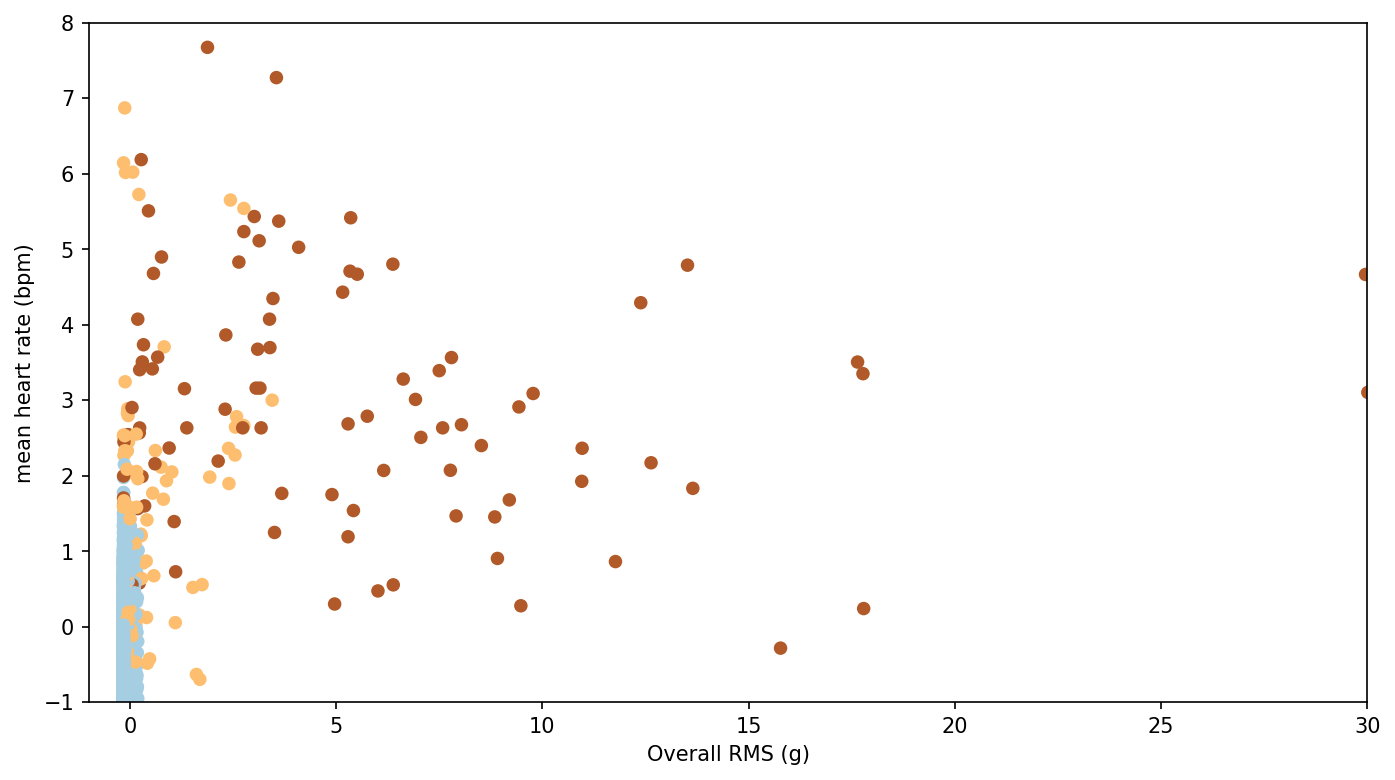

In [40]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

plt.rcParams['figure.dpi'] = 150
plt.figure(figsize=(11, 6))
plt.scatter(X_test_data_lr_1[:, 1], X_test_data_lr_1[:, 4], c=y_te, s=30, cmap=plt.cm.Paired)
#sns.scatterplot(data=X_train_data_lr_1, x=X_train_data_lr_1[:, [1]], y=X_train_data_lr_1[:, [4]], hue=y_train, palette="Dark2")
plt.xlabel('Overall RMS (g)')
plt.ylabel('mean heart rate (bpm)')
plt.xlim([-1, 30])
plt.ylim([-1, 8])



# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    svc,
    X_train_data_lr_1[:, [1, 4]],
    plot_method="contour",
    colors="blue",
    levels=[-1, 0, 1],
    alpha=0.9,
    linestyles=["--", "-", "--"],
    ax=ax,
)
#plot support vectors
['support-vector']
ax.scatter(
    svc.support_vectors_[:, 0],
    svc.support_vectors_[:, 1],
    s=100,
    linewidth=0.6,
    facecolors="none",
    edgecolors="y"
    #label=color
)

In [ ]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(12, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_ohe, s=30, cmap=plt.cm.Paired)
plt.xlim([-5, 150])
plt.ylim([30, 150])



# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    svc,
    x_df.iloc[:, :2].values,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
#plot support vectors
ax.scatter(
    svc.support_vectors_[:, 0],
    svc.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

### check validation output

In [ ]:
list1 = y_test.index
y_pred_df = pd.DataFrame(y_pred, columns = {'y_pred'})
y_pred_df = y_pred_df.set_index(list1)
pred_posture = y_pred_df.loc[misclf_df.loc[(misclf_df['folds'] == 4.0) & (misclf_df['is_misclassified'] == True)].index, 'y_pred']

y_test_df = pd.DataFrame(y_test.values, columns = {'y_test'})
y_test_df = y_test_df.set_index(list1)
true_posture = y_test_df.loc[misclf_df.loc[(misclf_df['folds'] == 4.0) & (misclf_df['is_misclassified'] == True)].index, 'y_test']

residuals = newd.loc[misclf_df.loc[(misclf_df['folds'] == 4.0) & (misclf_df['is_misclassified'] == True)].index]
residuals = residuals.reset_index()
residuals = residuals.drop('index', axis =1)
residuals['pred_posture'] = pred_posture.values
residuals['true_posture'] = true_posture.values
residuals

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(8, 5))
g = sns.FacetGrid(residuals, col="true_posture", hue="pred_posture")
g.map(sns.scatterplot, "2lagg_RMS", "3lagg_HR", alpha=.7)
g.add_legend()
new_title = 'Predicted posture'
g._legend.set_title(new_title)
g.axes[0,0].set_xlabel('2 lag RMS (g)', fontsize=12)
g.axes[0,1].set_xlabel('2 lag RMS (g)', fontsize=12)
g.axes[0,1].set_xlabel('2 lag RMS (g)', fontsize=12)

g.axes[0,0].set_ylabel('3 lag HR heart rate (bpm)', fontsize=12)

# Legend title
g.legend.get_title().set_fontsize(10)
# Legend texts
for text in g.legend.texts:
    text.set_fontsize(10)

plt.subplots_adjust(hspace=0.4, wspace=0.3)    
plt.savefig('svm multi-plot', bbox_inches='tight')


In [ ]:
####plot2 
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(14, 7))
sns.set_theme(style='white')
sns.countplot(y="activity", data=residuals, orient='h')
#plt.legend(title='Number of missclassified samples by activity', fontsize=7)
#plt.xlabel('True posture', fontsize=11);
plt.ylabel('Count', fontsize=11);
plt.title('Number of missclassified samples by activity', fontsize=17)
plt.savefig('svm miss-activity', bbox_inches='tight')

In [ ]:


#####plot3
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(5, 4))
sns.set_theme(style='white')
sns.countplot(x="true_posture", data=residuals)
#plt.legend(title='Number of missclassified samples by activity', fontsize=20)
plt.xlabel('True posture', fontsize=11);
plt.ylabel('Count', fontsize=11);
plt.title('Number of missclassified samples by posture', fontsize=12)
plt.savefig('svm miss-posture', bbox_inches='tight')

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(6, 4))
g = sns.FacetGrid(residuals, col="true_posture", hue="pred_posture")
g.map(sns.scatterplot, "Average_Mot_mg", "lagg_HR", alpha=.7)
g.add_legend()
new_title = 'Predicted posture'
g._legend.set_title(new_title)
g.axes[0,0].set_xlabel('Overall RMS (g)', fontsize=10)
g.axes[0,1].set_xlabel('Overall RMS (g)', fontsize=10)
g.axes[0,0].set_ylabel('lagg_HR heart rate (bpm)', fontsize=10)

# Legend title
g.legend.get_title().set_fontsize(10)
# Legend texts
for text in g.legend.texts:
    text.set_fontsize(10)

plt.subplots_adjust(hspace=0.4, wspace=0.3)   

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(18, 4))
sns.set_theme(style='white')
sns.countplot(x="activity", data=residuals)
#plt.legend(title='Number of missclassified samples by activity', fontsize=7)
#plt.xlabel('True posture', fontsize=11);
plt.ylabel('Count', fontsize=11);
plt.title('Number of missclassified samples by activity', fontsize=14)
#plt.tick_params(axis='both', which='major', labelsize=14)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(5, 4))
sns.set_theme(style='white')
sns.countplot(x="true_posture", data=residuals)
#plt.legend(title='Number of missclassified samples by activity', fontsize=20)
plt.xlabel('True posture', fontsize=11);
plt.ylabel('Count', fontsize=11);
plt.title('Number of missclassified samples by activity', fontsize=12)
#plt.tick_params(axis='both', which='major', labelsize=14)

### Test set

In [15]:
test_set = pd.read_csv('final_test_set_lyingdown.csv')

test_set['2lagg_HR'] = test_set['lagg_HR'].groupby(test_set['posture']).shift(1)
test_set = test_set.fillna(method='bfill')

test_set['2next_HR'] = test_set['next_HR'].groupby(test_set['posture']).shift(-1)
test_set = test_set.fillna(method='ffill')

test_set['3lagg_HR'] = test_set['2lagg_HR'].groupby(test_set['posture']).shift(1)
test_set = test_set.fillna(method='bfill')

test_set['3next_HR'] = test_set['2next_HR'].groupby(test_set['posture']).shift(-1)
test_set = test_set.fillna(method='ffill')

#df1['Average_HR_bpm'].groupby("posture", as_index=False).shift(-1)
test_set['lagg_RMS'] = test_set['Average_Mot_mg'].groupby(test_set['posture']).shift(1)
test_set = test_set.fillna(method='bfill')

test_set['next_RMS'] = test_set['Average_Mot_mg'].groupby(test_set['posture']).shift(-1)
test_set = test_set.fillna(method='ffill')

test_set['2lagg_RMS'] = test_set['lagg_RMS'].groupby(test_set['posture']).shift(1)
test_set = test_set.fillna(method='bfill')

test_set['2next_RMS'] = test_set['next_RMS'].groupby(test_set['posture']).shift(-1)
test_set = test_set.fillna(method='ffill')

cols = [ 'Average_Mot_mg', '2lagg_RMS', '2next_RMS', '3lagg_HR', '3next_HR']

dfx = test_set[cols]

y_test = test_set.pop('posture')

x_test = np.array(dfx)
x_test.shape

(4174, 5)

In [16]:
scaler = StandardScaler()
scaler.fit(x)
X_train_data_lr_1 = scaler.transform(x)
#X_test_data_lr_1 = scaler.transform(X_test)

    #SMOTE for data imbalance
    #smote = SMOTE(sampling_strategy='not majority')
    #X_train_data_lr_1, y_train_1  = smote.fit_resample(X_train_data_lr_1, train_y)
    #logistic regression model
svc = SVC(C = 0.1, kernel = 'linear', random_state = 3,  class_weight='balanced') 
# fit classifier to training set
svc.fit(X_train_data_lr_1, y)

SVC(C=0.1, class_weight='balanced', kernel='linear', random_state=3)

In [17]:
import pickle
# save the model to disk
filename = 'finalized_model_svm.sav'
pickle.dump(svc, open(filename, 'wb'))

In [18]:
loaded_model = pickle.load(open(filename, 'rb'))
X_test_data_lr_1 = scaler.transform(x_test)
loaded_model.predict(X_test_data_lr_1)

array(['sitting', 'sitting', 'sitting', ..., 'sitting', 'sitting',
       'sitting'], dtype=object)

In [19]:
loaded_model.score(X_test_data_lr_1, y_test)

0.8538572113080978

In [20]:
ypred = loaded_model.predict(X_test_data_lr_1)


 -------------Classification Report for Test set-------------

                  precision    recall  f1-score   support

      lying_down       0.98      0.87      0.92      3800
         sitting       0.27      0.67      0.39       279
standing+walking       0.64      0.86      0.73        95

        accuracy                           0.85      4174
       macro avg       0.63      0.80      0.68      4174
    weighted avg       0.93      0.85      0.88      4174



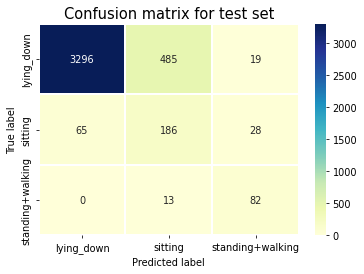

In [21]:
m1 = f1_score(y_test, ypred, average='weighted', zero_division = 0)
a1 =  accuracy_score(y_test, ypred)
print("\n -------------Classification Report for Test set-------------\n")
print(classification_report(y_test, ypred))

labels = ['lying_down', 'sitting', 'standing+walking']
confusion_matrix_1 = confusion_matrix(y_test, ypred)
sns.heatmap(confusion_matrix_1, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix for test set', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
m1

0.6796591719338178

In [ ]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(12,11))
dataplot = sns.heatmap(dfx.corr(), cmap="YlGnBu", annot=True, ax=ax)  